## Importing modules

In [1]:
import matplotlib.pyplot as plt
import nilearn.image as image
from nilearn.image import resample_to_img
from nilearn import datasets
from nilearn.maskers import NiftiMasker
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_img, plot_anat, plot_stat_map, plot_roi, plot_design_matrix, plot_contrast_matrix, view_img
import numpy as np
import os
import glob
import nibabel as nib
import pandas as pd
from pathlib import Path
import tracemalloc

C:\Users\ilari\AppData\Roaming\Python\Python39\site-packages\nilearn\glm\__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


## Defining global variables

In [106]:
#path_data = '/data/rainville/PAINxEFFORT/PREPROCESSED_SPM'
path_data= 'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives'
path_events = 'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/Output/Python'
path_mask = 'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images/output brain mask/gm_group_binarized_mask.nii'
path_out = 'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives'

sub = "sub-010"

t_r = 0.832

In [107]:
design_matrices = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "design_matrices" in d and not d.startswith("._")]
design_matrices.sort()
#print(design_matrices, sep = "\n")
[print(i) for i in design_matrices]

C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-01_desc-design_matrices.tsv.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-02_desc-design_matrices.tsv.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-03_desc-design_matrices.tsv.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-04_desc-design_matrices.tsv.gz


[None, None, None, None]

In [108]:
#visualize event file of design matrix 
design_matrix = pd.read_csv(design_matrices[0])
design_matrix

,Unnamed: 0,ContractionPain_30,ContractionPain_5,ContractionSolo_30,ContractionSolo_5,ContractionWarm_30,ContractionWarm_5,Pain_30,Pain_5,Warm_30,...,drift_9,drift_10,drift_11,drift_12,drift_13,drift_14,drift_15,drift_16,drift_17,constant
0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044061,0.044060,0.044059,0.044058,0.044057,0.044055,0.044054,0.044052,0.044050,1.0
1,0.832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044028,0.044019,0.044009,0.043999,0.043987,0.043975,0.043962,0.043947,0.043932,1.0
2,1.664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043962,0.043937,0.043910,0.043881,0.043849,0.043814,0.043777,0.043738,0.043696,1.0
3,2.496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043862,0.043814,0.043762,0.043704,0.043642,0.043574,0.043502,0.043424,0.043342,1.0
4,3.328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043729,0.043651,0.043564,0.043469,0.043366,0.043254,0.043135,0.043007,0.042871,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,852.800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.043729,0.043651,-0.043564,0.043469,-0.043366,0.043254,-0.043135,0.043007,-0.042871,1.0
1026,853.632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.043862,0.043814,-0.043762,0.043704,-0.043642,0.043574,-0.043502,0.043424,-0.043342,1.0
1027,854.464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.043962,0.043937,-0.043910,0.043881,-0.043849,0.043814,-0.043777,0.043738,-0.043696,1.0
1028,855.296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044028,0.044019,-0.044009,0.043999,-0.043987,0.043975,-0.043962,0.043947,-0.043932,1.0


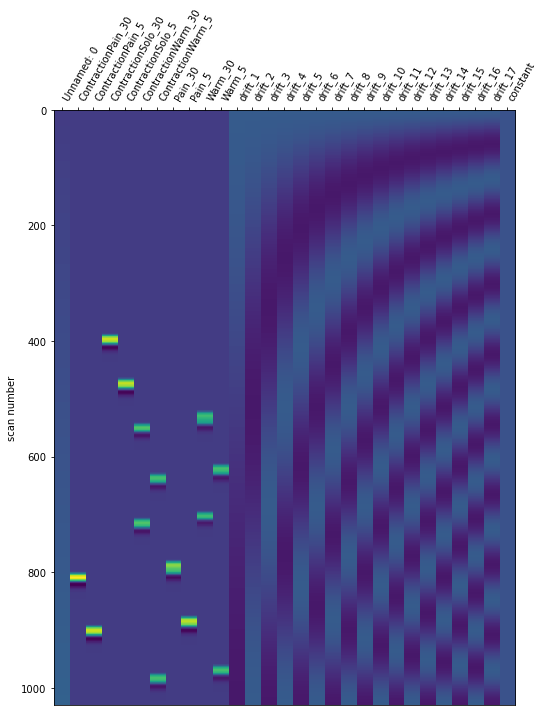

In [109]:
# Plot the design matrix

design_matrix_run1 = pd.read_csv(design_matrices[0])
design_matrix_run1
plot_design_matrix(design_matrix_run1)
plt.savefig(os.path.join(path_out, sub, f'{sub}-design matrix_run1.png'))
plt.show()

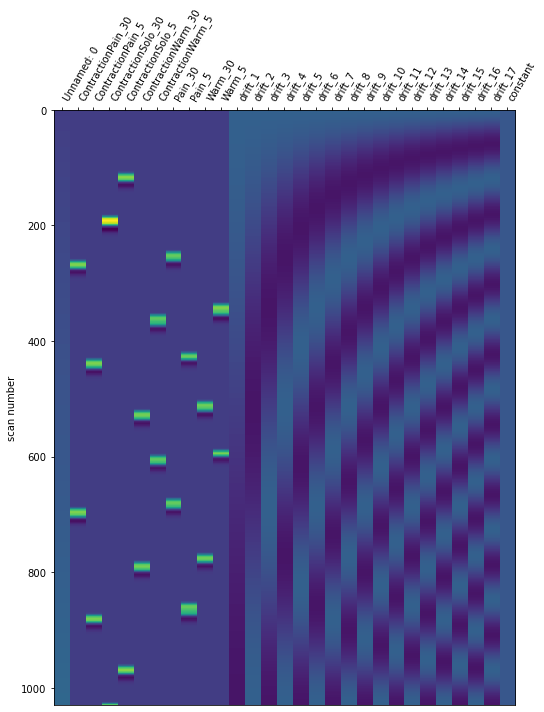

In [110]:
design_matrix_run2 = pd.read_csv(design_matrices[1])
design_matrix_run2
plot_design_matrix(design_matrix_run2)
plt.savefig(os.path.join(path_out, sub, f'{sub}-design matrix_run2.png'))
plt.show()


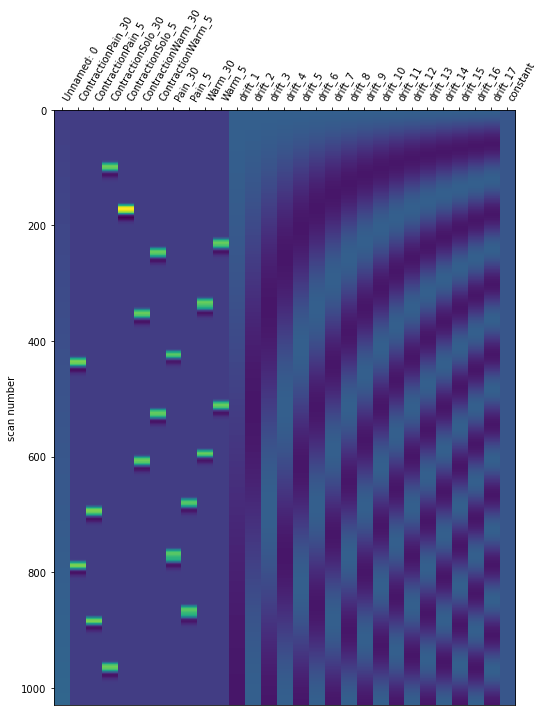

In [111]:
design_matrix_run3 = pd.read_csv(design_matrices[2])
plot_design_matrix(design_matrix_run3)
design_matrix_run3
plt.savefig(os.path.join(path_out, sub, f'{sub}-design matrix_run3.png'))
plt.show()

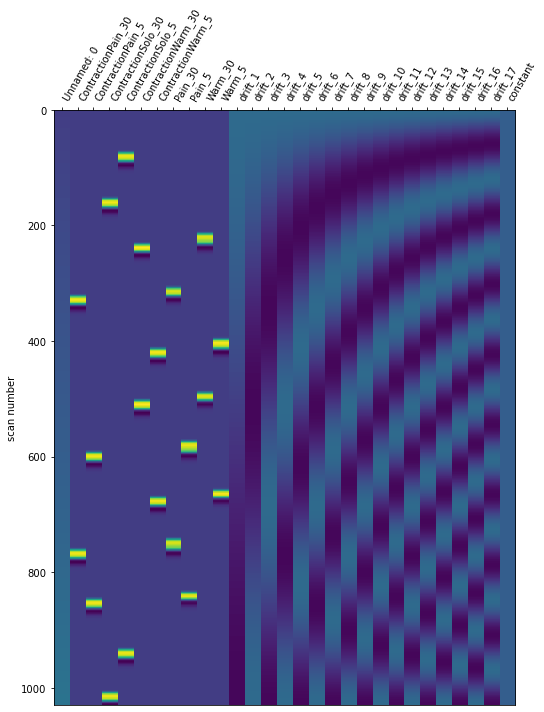

In [112]:
design_matrix_run4 = pd.read_csv(design_matrices[3])
plot_design_matrix(design_matrix_run4)
design_matrix_run4
plt.savefig(os.path.join(path_out, sub, f'{sub}-design matrix_run4.png'))
plt.show()

In [9]:
beta_maps_run1 = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "run-01" in d and "maps" in d and not d.startswith("._")]
beta_maps_run1.sort()
beta_maps_run2 = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "run-02" in d and "maps" in d and not d.startswith("._")]
beta_maps_run2.sort()
beta_maps_run3 = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "run-03" in d and "maps" in d and not d.startswith("._")]
beta_maps_run3.sort()
beta_maps_run4 = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "run-04" in d and "maps" in d and not d.startswith("._")]
beta_maps_run4.sort()
#print(beta_maps_run1, beta_maps_run2, beta_maps_run3, beta_maps_run4)
[print(i) for i in beta_maps_run1]
[print(i) for i in beta_maps_run2]
[print(i) for i in beta_maps_run3]
[print(i) for i in beta_maps_run4]

[]

In [11]:
run1_beta_map_contr30_5 = nib.load(beta_maps_run1[0])
run1_beta_map_contrsolo30_5 = nib.load(beta_maps_run1[0])
run1_beta_map_pain_warm = nib.load(beta_maps_run1[0])
run1_beta_map_all_contr = nib.load(beta_maps_run1[0])

run2_beta_map_contr30_5 = nib.load(beta_maps_run2[1])
run2_beta_map_contrsolo30_5 = nib.load(beta_maps_run2[1])
run2_beta_map_pain_warm = nib.load(beta_maps_run2[1])
run2_beta_map_all_contr = nib.load(beta_maps_run2[1])

run3_beta_map_contr30_5 = nib.load(beta_maps_run3[2])
run3_beta_map_contrsolo30_5 = nib.load(beta_maps_run3[2])
run3_beta_map_pain_warm = nib.load(beta_maps_run3[2])
run3_beta_map_all_contr = nib.load(beta_maps_run3[2])

run4_beta_map_contr30_5 = nib.load(beta_maps_run4[3])
run4_beta_map_contrsolo30_5 = nib.load(beta_maps_run4[3])
run4_beta_map_pain_warm = nib.load(beta_maps_run4[3])
run4_beta_map_all_contr = nib.load(beta_maps_run4[3])

IndexError: list index out of range

In [ ]:
plot_stat_map(
    run1_beta_map_contr30_5,
    display_mode="z",
    title=f"{sub} - Run 1",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_contr30_5_run1.png'))

In [ ]:
plot_stat_map(
    run2_beta_map_contr30_5,
    display_mode="z",
    title=f"{sub} - Run 2",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_contr30_5_run2.png'))

In [ ]:
plot_stat_map(
    run3_beta_map_contr30_5,
    display_mode="z",
    title=f"{sub} - Run 3",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_contr30_5_run3.png'))

In [ ]:
plot_stat_map(
    run4_beta_map_contr30_5,
    display_mode="z",
    title=f"{sub} - Run 4",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_contr30_5_run4.png'))

In [ ]:
plot_stat_map(
    run1_beta_map_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 1",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_contrsolo30_5_run1.png'))

In [ ]:
plot_stat_map(
    run2_beta_map_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 2",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_contrsolo30_5_run2.png'))

In [ ]:
plot_stat_map(
    run3_beta_map_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 3",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_contrsolo30_5_run3.png'))

In [ ]:
plot_stat_map(
    run4_beta_map_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 4",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_contrsolo30_5_run4.png'))

In [ ]:
plot_stat_map(
    run1_beta_map_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 1",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_pain_warm_run1.png'))

In [ ]:
plot_stat_map(
    run2_beta_map_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 2",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_pain_warm_run2.png'))

In [ ]:
plot_stat_map(
    run3_beta_map_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 3",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_pain_warm_run3.png'))

In [ ]:
plot_stat_map(
    run4_beta_map_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 4",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_pain_warm_run4.png'))

In [ ]:
plot_stat_map(
    run1_beta_map_all_contr,
    display_mode="z",
    title=f"{sub} - Run 1",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_all_contraction_run1.png'))

In [ ]:
plot_stat_map(
    run2_beta_map_all_contr,
    display_mode="z",
    title=f"{sub} - Run 2",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_all_contraction_run2.png'))

In [ ]:
plot_stat_map(
    run3_beta_map_all_contr,
    display_mode="z",
    title=f"{sub} - Run 3",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_all_contraction_run3.png'))

In [ ]:
plot_stat_map(
    run4_beta_map_all_contr,
    display_mode="z",
    title=f"{sub} - Run 4",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-beta_map_all_contraction_run4.png'))

In [113]:
z_score_all_contr = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "all contraction thermal stim " in d and "z_score" in d and not d.startswith("._")]
z_score_all_contr.sort()
z_score_contr30_5 = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "contraction 30%-5%" in d and "z_score" in d and not d.startswith("._")]
z_score_contr30_5.sort()
z_score_contrsolo30_5 = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "contractionSolo 30%-5%" in d and "z_score" in d and not d.startswith("._")]
z_score_contrsolo30_5.sort()
z_score_pain_warm = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "pain - warm" in d and "z_score" in d and not d.startswith("._")]
z_score_pain_warm.sort()
#print(beta_maps_run1, beta_maps_run2, beta_maps_run3, beta_maps_run4)
[print(i) for i in z_score_all_contr]
[print(i) for i in z_score_contr30_5]
[print(i) for i in z_score_contrsolo30_5]
[print(i) for i in z_score_pain_warm]

C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-01_desc-all contraction thermal stim - thermal stim-z_score.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-02_desc-all contraction thermal stim - thermal stim-z_score.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-03_desc-all contraction thermal stim - thermal stim-z_score.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-04_desc-all contraction thermal stim - thermal stim-z_score.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-01_desc-contraction 30%-5%-z_score.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_ta

[None, None, None, None]

In [114]:
run1_z_score_contr30_5 = nib.load(z_score_contr30_5[0])
run1_z_score_contrsolo30_5 = nib.load(z_score_contrsolo30_5[0])
run1_z_score_pain_warm = nib.load(z_score_pain_warm[0])
run1_z_score_all_contr = nib.load(z_score_all_contr[0])

run2_z_score_contr30_5 = nib.load(z_score_contr30_5[1])
run2_z_score_contrsolo30_5 = nib.load(z_score_contrsolo30_5[1])
run2_z_score_pain_warm = nib.load(z_score_pain_warm[1])
run2_z_score_all_contr = nib.load(z_score_all_contr[1])

run3_z_score_contr30_5 = nib.load(z_score_contr30_5[2])
run3_z_score_contrsolo30_5 = nib.load(z_score_contrsolo30_5[2])
run3_z_score_pain_warm = nib.load(z_score_pain_warm[2])
run3_z_score_all_contr = nib.load(z_score_all_contr[2])

run4_z_score_contr30_5 = nib.load(z_score_contr30_5[3])
run4_z_score_contrsolo30_5 = nib.load(z_score_contrsolo30_5[3])
run4_z_score_pain_warm = nib.load(z_score_pain_warm[3])
run4_z_score_all_contr = nib.load(z_score_all_contr[3])

In [115]:
print(z_score_pain_warm[0])

C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-01_desc-pain - warm-z_score.nii.gz


In [116]:
z_score_pain_warm[1]

'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\\sub-010\\swvrsub-010_task-pain_run-02_desc-pain - warm-z_score.nii.gz'

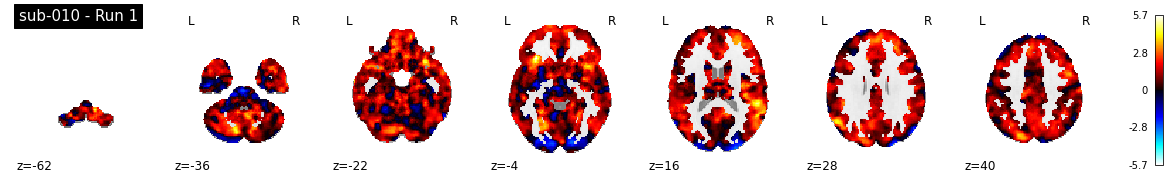

In [117]:
plot_stat_map(
    run1_z_score_contr30_5,
    display_mode="z",
    title=f"{sub} - Run 1",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_contr30_5_run1.png'))

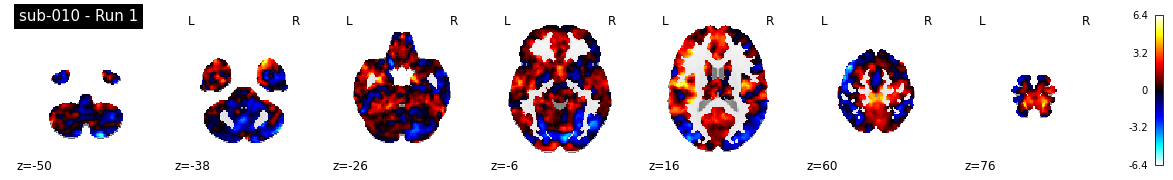

In [118]:
plot_stat_map(
    run1_z_score_all_contr,
    display_mode="z",
    title=f"{sub} - Run 1",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_all_contraction_run1.png'))

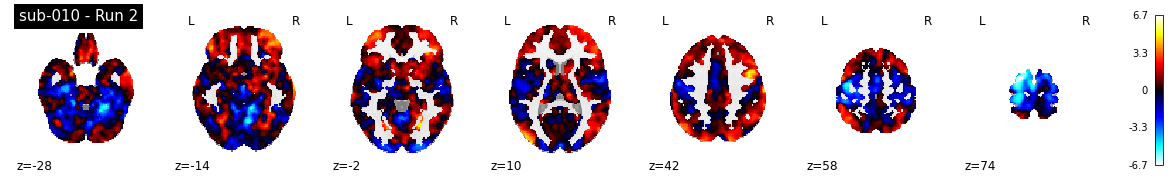

In [119]:
plot_stat_map(
    run2_z_score_all_contr,
    display_mode="z",
    title=f"{sub} - Run 2",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_all_contraction_run2.png'))

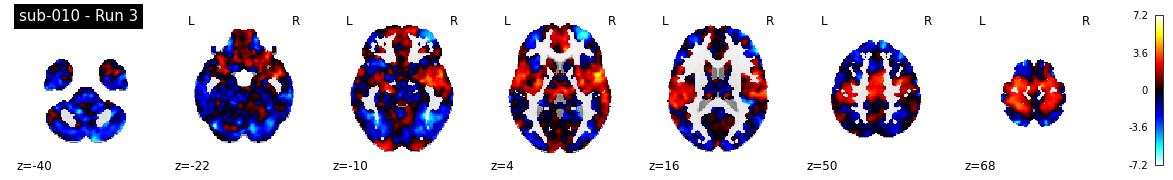

In [120]:
plot_stat_map(
    run3_z_score_all_contr,
    display_mode="z",
    title=f"{sub} - Run 3",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_all_contraction_run3.png'))

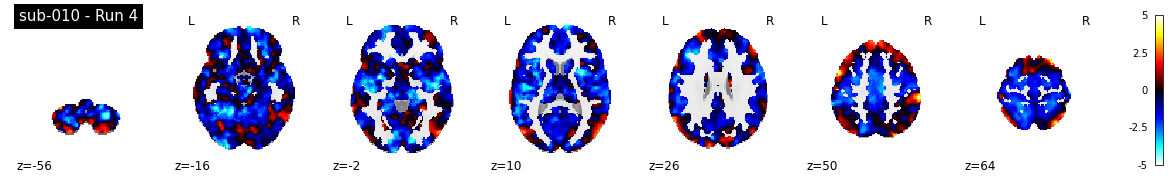

In [121]:
plot_stat_map(
    run4_z_score_all_contr,
    display_mode="z",
    title=f"{sub} - Run 4",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_all_contraction_run4.png'))

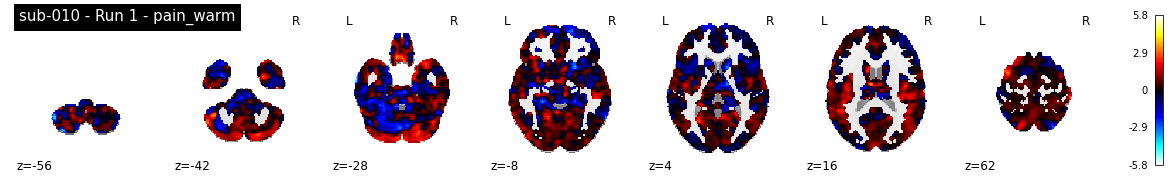

In [122]:
plot_stat_map(
    run1_z_score_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 1 - pain_warm",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_pain_warm_run1.png'))

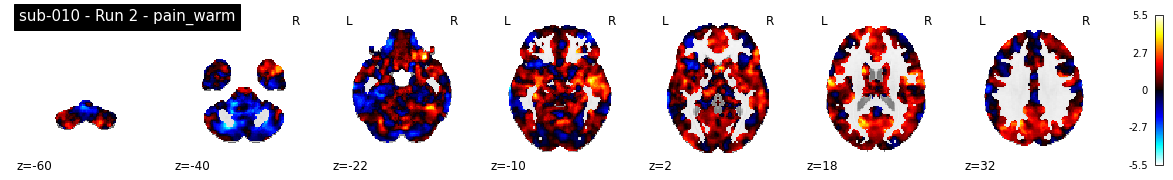

In [123]:
plot_stat_map(
    run2_z_score_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 2 - pain_warm",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_pain_warm_run2.png'))

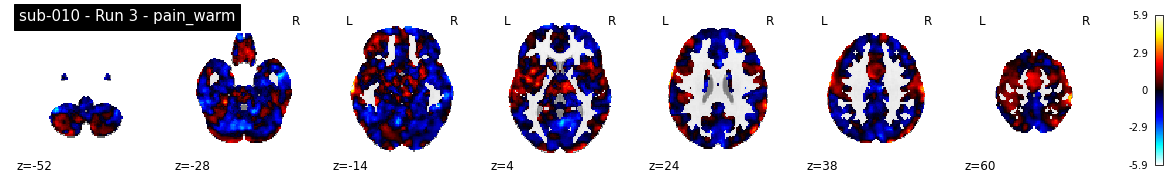

In [124]:
plot_stat_map(
    run3_z_score_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 3 - pain_warm",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_pain_warm_run3.png'))

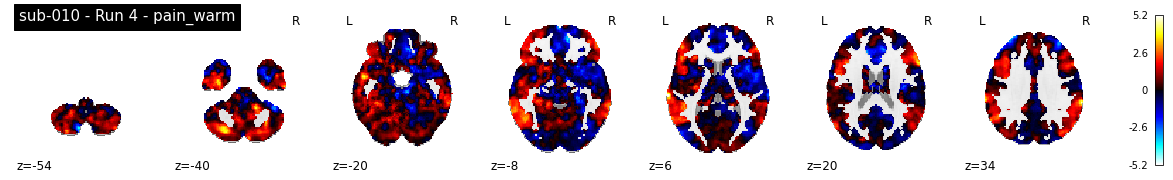

In [125]:
plot_stat_map(
    run4_z_score_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 4 - pain_warm",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_pain_warm_run4.png'))

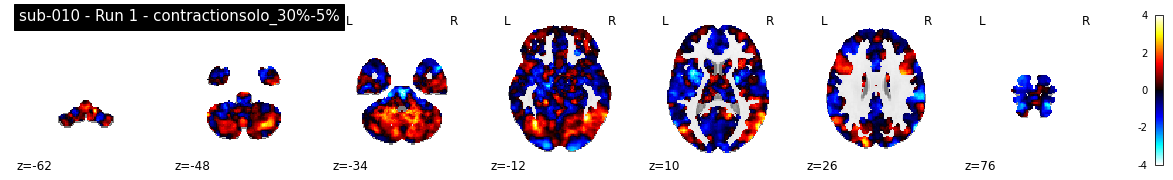

In [145]:
plot_stat_map(
    run1_z_score_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 1 - contractionsolo_30%-5%",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_contrsolo30_5_run1.png'))

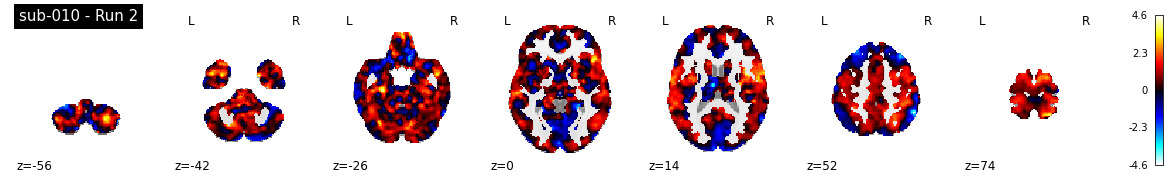

In [127]:
plot_stat_map(
    run2_z_score_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 2",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_contrsolo30_5_run2.png'))

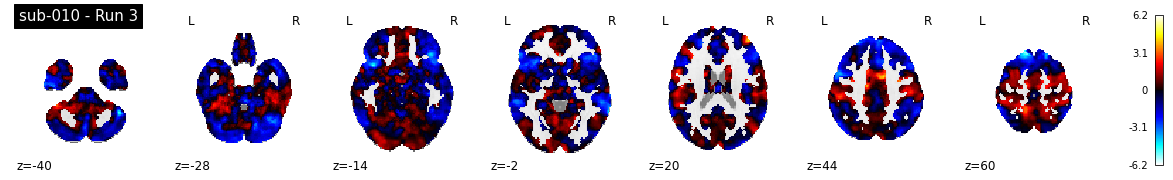

In [128]:
plot_stat_map(
    run3_z_score_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 3",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_contrsolo30_5_run3.png'))

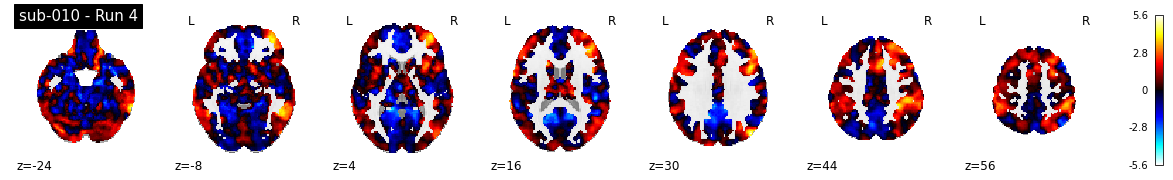

In [129]:
plot_stat_map(
    run4_z_score_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 4",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_contrsolo30_5_run4.png'))

In [130]:
stat_all_contr = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "all contraction thermal stim " in d and "stat" in d and not d.startswith("._")]
stat_all_contr.sort()
stat_contr30_5 = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "contraction 30%-5%" in d and "stat" in d and not d.startswith("._")]
stat_contr30_5.sort()
stat_contrsolo30_5 = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "contractionSolo 30%-5%" in d and "stat" in d and not d.startswith("._")]
stat_contrsolo30_5.sort()
stat_pain_warm = [os.path.join(path_data,sub,d) for d in os.listdir(os.path.join(path_data, sub)) if "swvrsub" in d and "pain - warm" in d and "stat" in d and not d.startswith("._")]
stat_pain_warm.sort()
#print(beta_maps_run1, beta_maps_run2, beta_maps_run3, beta_maps_run4)
[print(i) for i in stat_all_contr]
[print(i) for i in stat_contr30_5]
[print(i) for i in stat_contrsolo30_5]
[print(i) for i in stat_pain_warm]

C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-01_desc-all contraction thermal stim - thermal stim-stat.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-02_desc-all contraction thermal stim - thermal stim-stat.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-03_desc-all contraction thermal stim - thermal stim-stat.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-04_desc-all contraction thermal stim - thermal stim-stat.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-01_desc-contraction 30%-5%-stat.nii.gz
C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\sub-010\swvrsub-010_task-pain_run-02_

[None, None, None, None]

In [131]:
run1_stat_contr30_5 = nib.load(stat_contr30_5[0])
run1_stat_contrsolo30_5 = nib.load(stat_contrsolo30_5[0])
run1_stat_pain_warm = nib.load(stat_pain_warm[0])
run1_stat_all_contr = nib.load(stat_all_contr[0])

run2_stat_contr30_5 = nib.load(stat_contr30_5[1])
run2_stat_contrsolo30_5 = nib.load(stat_contrsolo30_5[1])
run2_stat_pain_warm = nib.load(stat_pain_warm[1])
run2_stat_all_contr = nib.load(stat_all_contr[1])

run3_stat_contr30_5 = nib.load(stat_contr30_5[2])
run3_stat_contrsolo30_5 = nib.load(stat_contrsolo30_5[2])
run3_stat_pain_warm = nib.load(stat_pain_warm[2])
run3_stat_all_contr = nib.load(stat_all_contr[2])

run4_stat_contr30_5 = nib.load(stat_contr30_5[3])
run4_stat_contrsolo30_5 = nib.load(stat_contrsolo30_5[3])
run4_stat_pain_warm = nib.load(stat_pain_warm[3])
run4_stat_all_contr = nib.load(stat_all_contr[3])

In [132]:
stat_all_contr[0]


'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/derivatives\\sub-010\\swvrsub-010_task-pain_run-01_desc-all contraction thermal stim - thermal stim-stat.nii.gz'

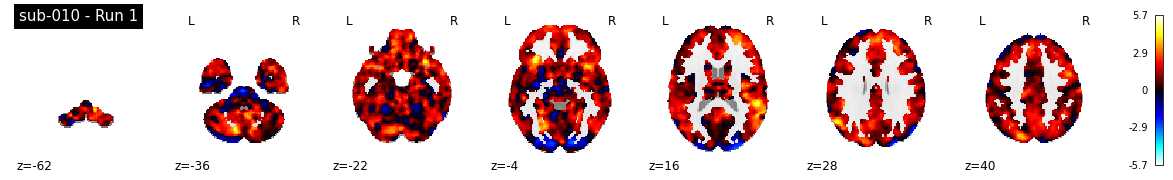

In [133]:
plot_stat_map(
    run1_stat_contr30_5,
    display_mode="z",
    title=f"{sub} - Run 1",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-stat_contr30_5_run1.png'))

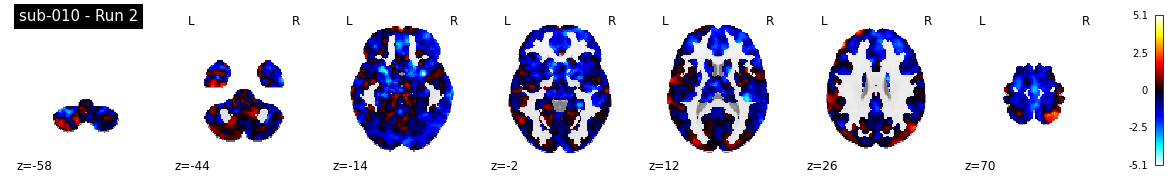

In [134]:
plot_stat_map(
    run2_stat_contr30_5,
    display_mode="z",
    title=f"{sub} - Run 2",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-stat_contr30_5_run2.png'))

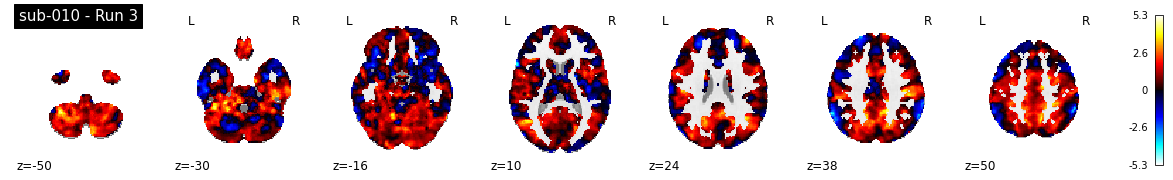

In [135]:
plot_stat_map(
    run3_stat_contr30_5,
    display_mode="z",
    title=f"{sub} - Run 3",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-stat_contr30_5_run3.png'))

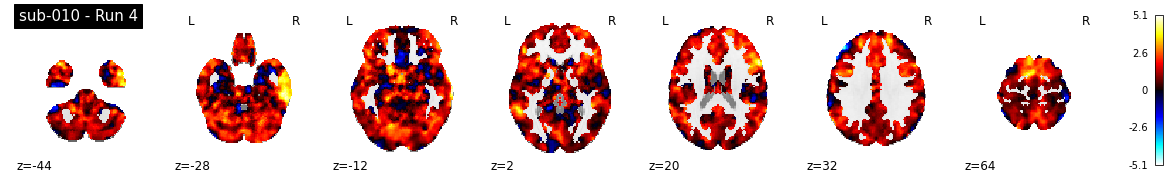

In [136]:
plot_stat_map(
    run4_stat_contr30_5,
    display_mode="z",
    title=f"{sub} - Run 4",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-stat_contr30_5_run4.png'))

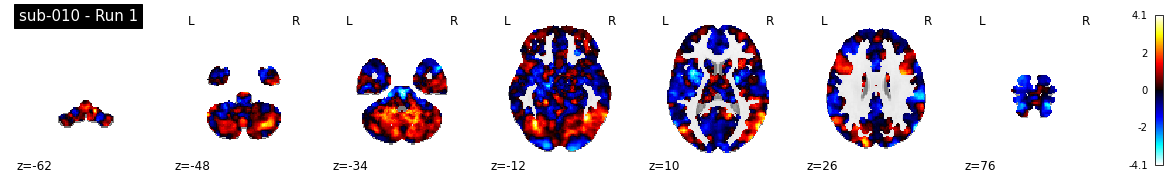

In [137]:
plot_stat_map(
    run1_stat_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 1",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_contrsolo30_5_run1.png'))

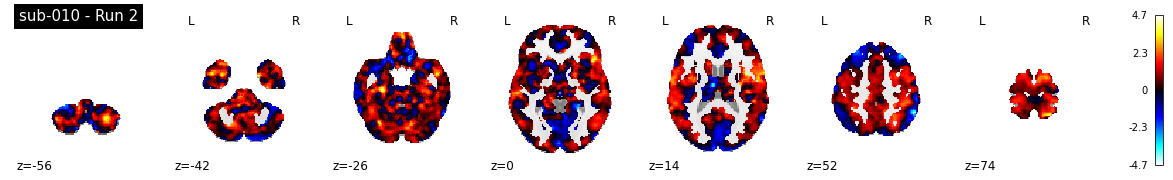

In [138]:
plot_stat_map(
    run2_stat_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 2",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_contrsolo30_5_run2.png'))

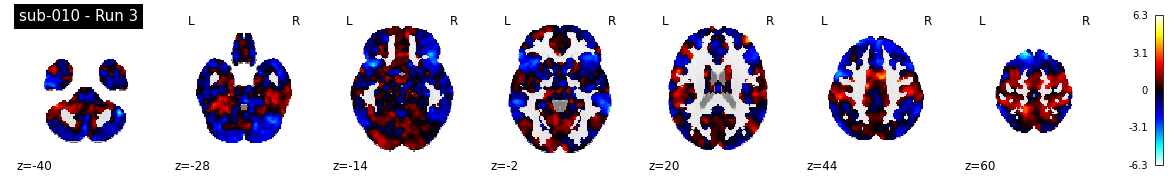

In [139]:
plot_stat_map(
    run3_stat_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 3",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_contrsolo30_5_run3.png'))

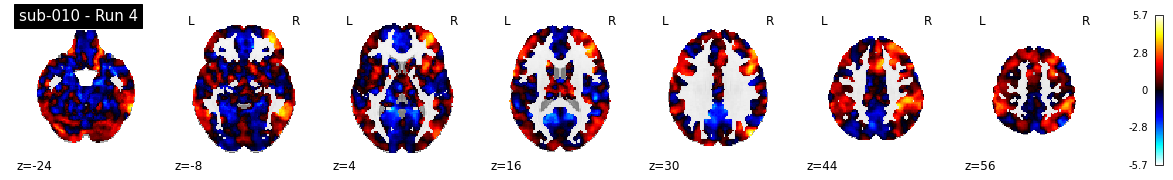

In [140]:
plot_stat_map(
    run4_stat_contrsolo30_5,
    display_mode="z",
    title=f"{sub} - Run 4",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_contrsolo30_5_run4.png'))

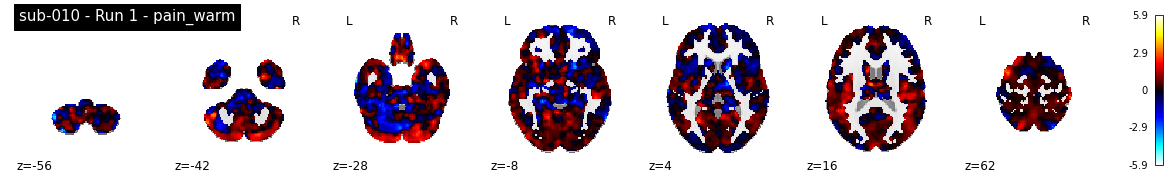

In [141]:
plot_stat_map(
    run1_stat_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 1 - pain_warm",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_pain_warm_run1.png'))

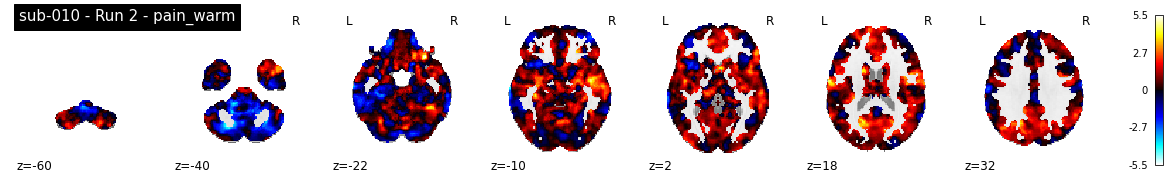

In [142]:
plot_stat_map(
    run2_stat_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 2 - pain_warm",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_pain_warm_run2.png'))

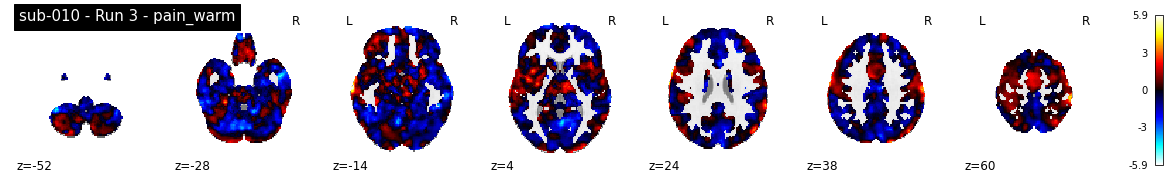

In [143]:
plot_stat_map(
    run3_stat_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 3 - pain_warm",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_pain_warm_run3.png'))

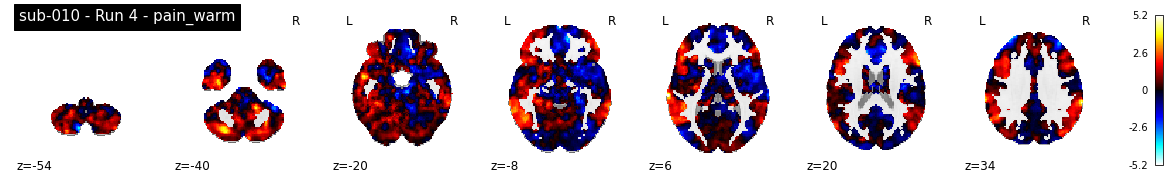

In [144]:
plot_stat_map(
    run4_stat_pain_warm,
    display_mode="z",
    title=f"{sub} - Run 4 - pain_warm",
)
plt.savefig(os.path.join(path_out, sub, f'{sub}-z_score_pain_warm_run4.png'))